In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
import pandas as pd

plt.style.use('ggplot')
%matplotlib inline 

In [3]:
data = pd.read_csv('train.csv', index_col = 0)
data.shape

(30471, 291)

ИЗУЧЕНИЕ ОБЩЙ ИНФОРМАЦИИ

Посмотрим на основные описательные статистики

In [4]:
data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
data.tail()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,15,5,0,15,26,1,2,84,6,7400000
30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,313,128,24,98,182,1,82,171,15,25000000
30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,22,1,1,6,31,1,4,65,7,13500000
30473,2015-06-30,43,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,2.0,...,5,2,0,7,16,0,9,54,10,5600000


In [6]:
data.dtypes

timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
max_floor             float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 291, dtype: object

In [7]:
data.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [8]:
data.describe(include='object')

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [9]:
#количество пропусков в датасете

data.isna().sum()

timestamp                0
full_sq                  0
life_sq               6383
floor                  167
max_floor             9572
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 291, dtype: int64

In [10]:
#количество явных дубликатов
data.duplicated().sum()

10

Посмотрим на временные переменные

In [11]:
data.timestamp.value_counts().sort_index() # дата заключения сделки

timestamp
2011-08-20     1
2011-08-23     1
2011-08-27     1
2011-09-01     1
2011-09-05     1
              ..
2015-06-25    16
2015-06-26    13
2015-06-27    11
2015-06-29    11
2015-06-30    10
Name: count, Length: 1161, dtype: int64

In [12]:
data.build_year.value_counts().sort_index() # дата постройки

build_year
0.0           530
1.0           368
3.0             2
20.0            1
71.0            1
             ... 
2016.0        375
2017.0        154
2018.0          1
4965.0          1
20052009.0      1
Name: count, Length: 119, dtype: int64

In [13]:
future = data[ (data.build_year > 2018) ]
print(future)

        timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
id                                                                            
10092  2013-08-27       37     16.0    8.0       12.0       1.0  20052009.0   
15223  2014-02-19       41     24.0    4.0        9.0       2.0      4965.0   

       num_room  kitch_sq  state  ... cafe_count_5000_price_2500  \
id                                ...                              
10092       1.0       9.0   33.0  ...                         46   
15223       2.0       5.0    3.0  ...                         32   

      cafe_count_5000_price_4000  cafe_count_5000_price_high  \
id                                                             
10092                          8                           2   
15223                          4                           0   

       big_church_count_5000  church_count_5000  mosque_count_5000  \
id                                                                   
10092        

In [14]:
# удалим недвижимость будущего
data.drop(data[data.build_year > 2018].index)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,15,5,0,15,26,1,2,84,6,7400000
30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,313,128,24,98,182,1,82,171,15,25000000
30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959


Text(0.5, 1.0, 'Price')

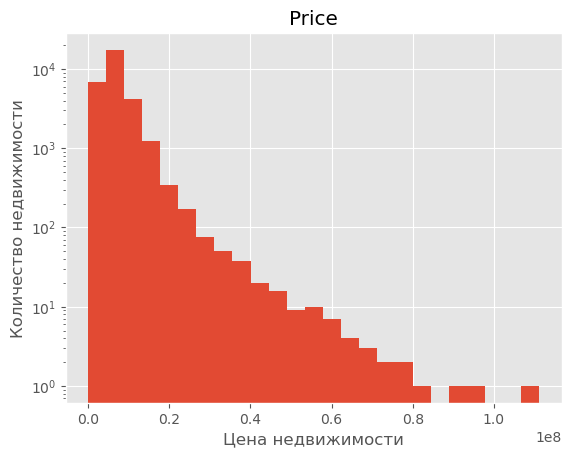

In [15]:
data.price_doc.hist(bins=25, log=True)
plt.xlabel('Цена недвижимости')
plt.ylabel('Количество недвижимости')
plt.title('Price')

Text(0.5, 1.0, 'log price')

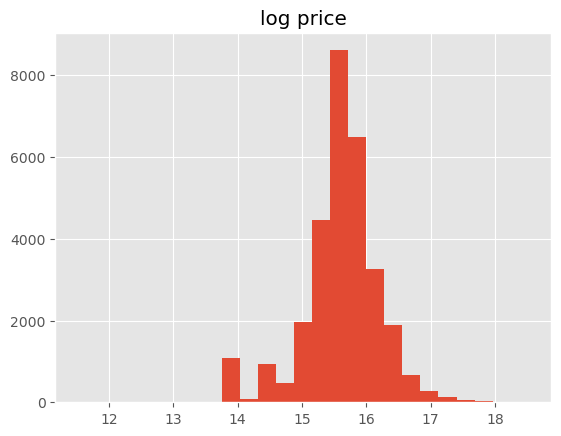

In [16]:
data.price_doc.apply(lambda p: np.log(p + 1)).hist(bins=25);
plt.title('log price')

ПРЕДОБРАБОТКА ДАННЫХ

Заполним пропуски с недостающими данными

In [17]:
print('Медианное значение material: ', data.material.median())

Медианное значение material:  1.0


In [18]:
data.material.fillna(1.0, inplace=True)

In [19]:
print('Медианное значение state: ', data.state.median())

Медианное значение state:  2.0


In [20]:
data.state.fillna(2.0, inplace=True)

In [21]:
print('Медианное значение build_year', data.build_year.median())

Медианное значение build_year 1979.0


In [22]:
data.build_year.fillna(1979.0, inplace = True)

In [23]:
print('Медианное значение floor: ', data.floor.median())

Медианное значение floor:  6.5


In [24]:
data.floor.fillna(6.0, inplace=True)

In [25]:
print('Медианное значение max_floor: ', data.max_floor.median())

Медианное значение max_floor:  12.0


In [26]:
data.max_floor.fillna(12.0, inplace = True)

In [27]:
print('Медианное значение num_room: ', data.num_room.median())

Медианное значение num_room:  2.0


In [28]:
data.num_room.fillna(2.0, inplace = True)

In [29]:
print('Медианное значение life_sq: ', data.life_sq.median())

Медианное значение life_sq:  30.0


In [30]:
data.life_sq.fillna(30.0, inplace = True)

In [31]:
data.cafe_sum_5000_min_price_avg.fillna(0, inplace = True)
data.cafe_sum_5000_max_price_avg.fillna(0, inplace = True)
data.cafe_avg_price_5000.fillna(0, inplace = True)
data.prom_part_5000.fillna(0, inplace = True)
data.cafe_sum_3000_min_price_avg.fillna(0, inplace = True)
data.cafe_sum_3000_max_price_avg.fillna(0, inplace = True)
data.cafe_avg_price_3000.fillna(0, inplace = True)
data.cafe_sum_2000_min_price_avg.fillna(0, inplace = True)
data.cafe_sum_2000_max_price_avg.fillna(0, inplace = True)
data.cafe_avg_price_2000.fillna(0, inplace = True)
data.cafe_sum_1500_min_price_avg.fillna(0, inplace = True)
data.cafe_sum_1500_max_price_avg.fillna(0, inplace = True)
data.cafe_avg_price_1500.fillna(0, inplace = True)
data.cafe_sum_1000_min_price_avg.fillna(0, inplace = True)
data.cafe_sum_1000_max_price_avg.fillna(0, inplace = True)
data.cafe_avg_price_1000.fillna(0, inplace = True)
data.cafe_sum_500_min_price_avg.fillna(0, inplace = True)
data.cafe_sum_500_max_price_avg.fillna(0, inplace = True)
data.cafe_avg_price_500.fillna(0, inplace = True)
data.railroad_station_walk_km.fillna(0, inplace = True)
data.railroad_station_walk_min.fillna(0, inplace = True)
data.ID_railroad_station_walk.fillna(0, inplace = True)
data.metro_min_walk.fillna(0, inplace = True)
data.metro_km_walk.fillna(0, inplace = True)
data.raion_build_count_with_material_info = data.raion_build_count_with_material_info.fillna(0, inplace = True)
data.build_count_block.fillna(0, inplace = True)
data.build_count_wood.fillna(0, inplace = True)
data.build_count_frame.fillna(0, inplace = True)
data.build_count_brick.fillna(0, inplace = True)
data.build_count_monolith.fillna(0, inplace = True)
data.build_count_panel.fillna(0, inplace = True)
data.build_count_foam.fillna(0, inplace = True)
data.build_count_slag.fillna(0, inplace = True)
data.build_count_mix.fillna(0, inplace = True)
data.raion_build_count_with_builddate_info = data.raion_build_count_with_builddate_info.fillna(0, inplace = True)
data.hospital_beds_raion.fillna(0, inplace = True)
data.school_quota.fillna(0, inplace = True)
data.preschool_quota.fillna(0, inplace = True)
data.kitch_sq.fillna(0, inplace = True)

In [32]:
data.drop(['build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'build_count_before_1920'], axis = 1, inplace = True)

In [33]:
data.drop(['raion_build_count_with_material_info', 'raion_build_count_with_builddate_info'], axis=1, inplace=True)

In [34]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
data.isna().sum()

timestamp             0
full_sq               0
life_sq               0
floor                 0
max_floor             0
                     ..
mosque_count_5000     0
leisure_count_5000    0
sport_count_5000      0
market_count_5000     0
price_doc             0
Length: 284, dtype: int64

Проведем исследовательский анализ данных

Рассмотрим площадь:

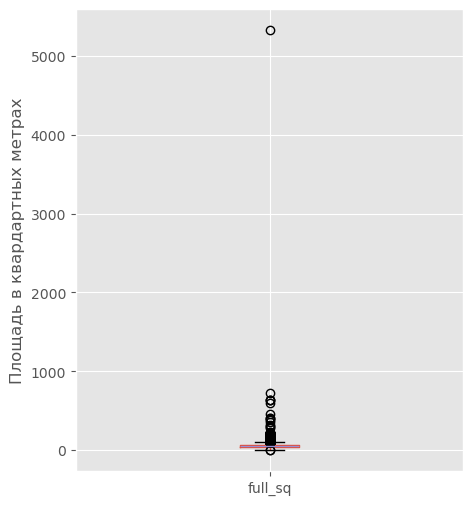

In [35]:
data.boxplot(column=['full_sq'], figsize=(5, 6), grid=True)
plt.ylabel('Площадь в квардартных метрах')
plt.show()

In [36]:
data['full_sq'].describe()

count    30471.000000
mean        54.214269
std         38.031487
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

In [37]:
gd = data.query('full_sq < 100')

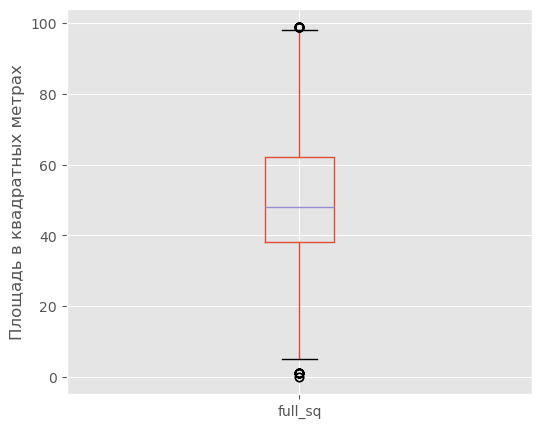

In [38]:
gd.boxplot(column=['full_sq'], figsize=(6, 5), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

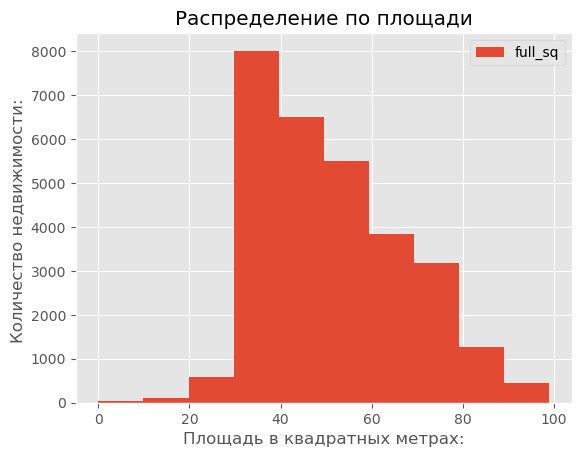

In [40]:
gd.sort_values(by='full_sq', ascending=True).plot(kind='hist', y='full_sq',title='Распределение по площади')
plt.xlabel('Площадь в квадратных метрах:')
plt.ylabel('Количество недвижимости: ')
plt.show()

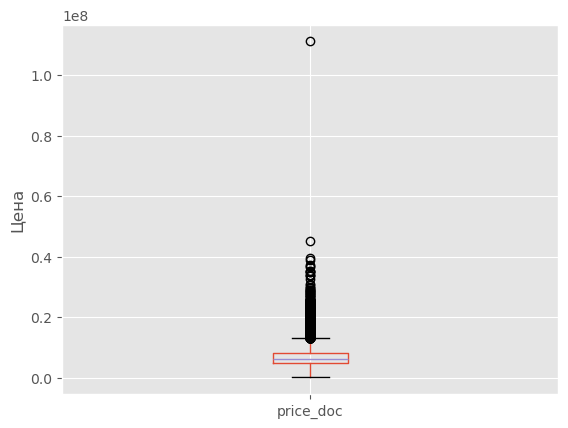

In [41]:
gd.boxplot('price_doc')
plt.ylabel('Цена')
plt.show()

In [42]:
data['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [43]:
# ограничим значение price_doc
gd = gd.query('price_doc < 9000000')

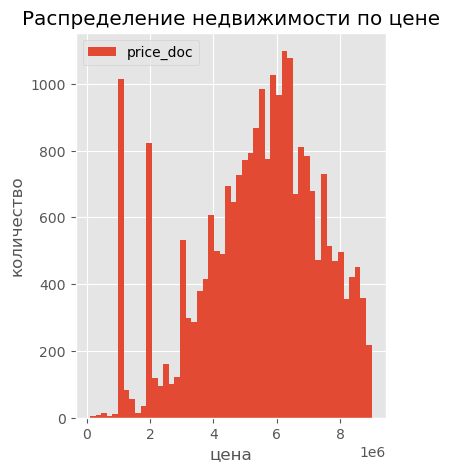

In [51]:
gd.plot(kind='hist', y='price_doc', title='Распределение недвижимости по цене',grid=True, bins=50, figsize=(4, 5))
plt.ylabel('количество')
plt.xlabel('цена')
plt.show()

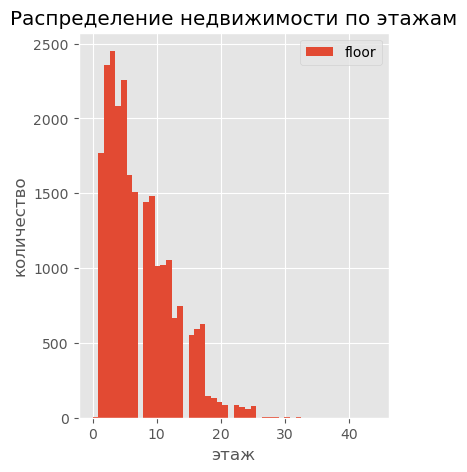

In [56]:
gd.plot(kind='hist', y='floor', title='Распределение недвижимости по этажам',grid=True, bins=50, figsize=(4, 5))
plt.ylabel('количество')
plt.xlabel('этаж')
plt.show()

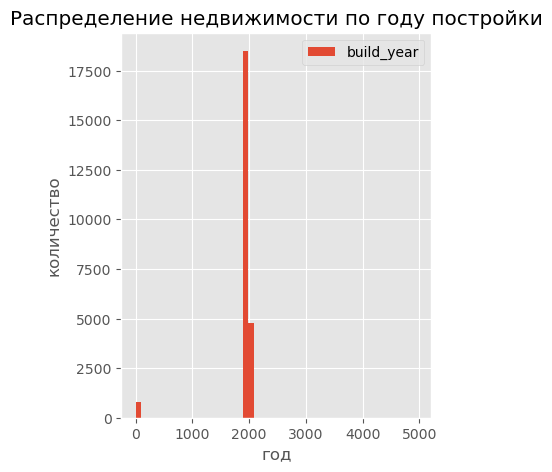

In [60]:
gd.plot(kind='hist', y='build_year', title='Распределение недвижимости по году постройки',grid=True, bins=50, figsize=(4, 5))
plt.ylabel('количество')
plt.xlabel('год')
plt.show()

Вывод:

Посмотрим на завимость цены от некоторых факторов:

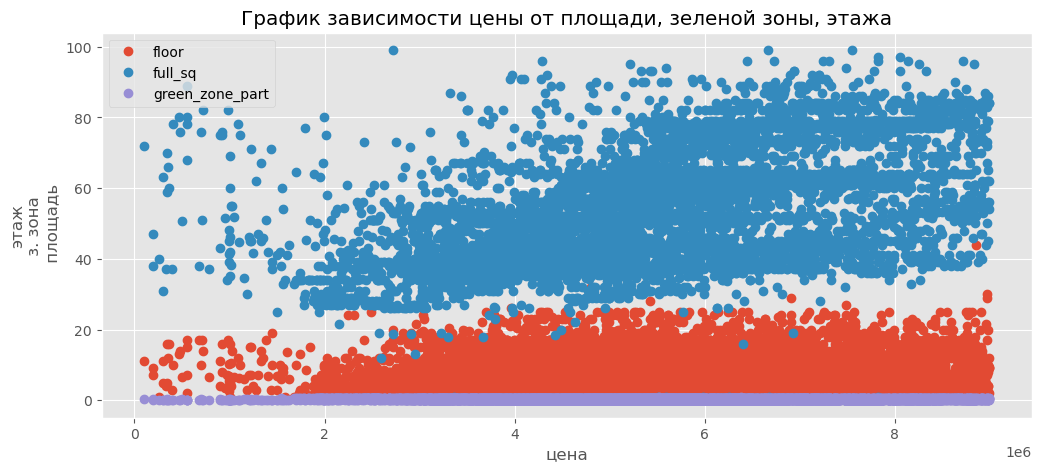

In [123]:
(gd
    
     .pivot_table(index='price_doc', values=['full_sq','floor', 'green_zone_part'])
     .plot(style='o',grid=True, figsize=(12, 5), title='График зависимости цены от площади, зеленой зоны, этажа')
)
plt.xlabel('цена')
plt.ylabel('этаж\n з. зона \n площадь')
plt.show()

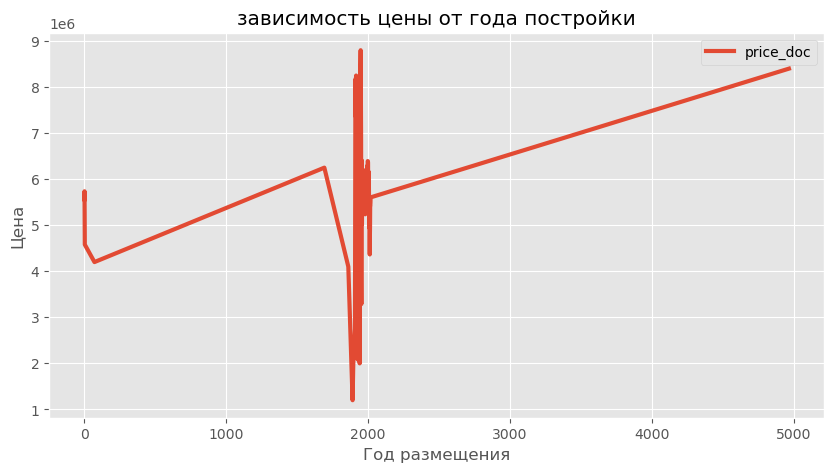

In [89]:
(gd
    
     .pivot_table(index='build_year', values=['price_doc'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='зависимость цены от года постройки')
     
)
plt.xlabel('Год размещения')
plt.ylabel('Цена')

plt.show()

Посмотрим на данные макроэкономики

In [81]:
datamacro = pd.read_csv('macro.csv', index_col = 0)

In [83]:
datamacro.describe()

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,2484.000000,2394.000000,2394.000000,2453.000000,2453.000000,2119.000000,2453.000000,2394.000000,2481.000000,2481.000000,...,730.000000,2191.000000,1461.00000,2191.000000,1461.000000,1826.000000,1461.00000,1461.000000,1826.000000,1826.000000
mean,86.467157,16993.230075,1.523726,407.808398,480.216347,110.122308,15.344006,16.846742,40.732406,50.444801,...,480.500000,8691.922410,580.51540,0.443398,1245.543463,349902.577766,25.06859,67.800034,36282.434830,230615.059255
std,27.528709,3187.074480,2.875659,65.895969,70.286366,14.818429,3.878104,16.988727,15.006583,13.905912,...,209.643641,1668.967502,37.98811,0.016061,162.526951,72146.453110,2.44944,5.168602,10761.669111,2944.879242
min,29.112500,9995.800000,-4.500000,315.100000,337.200000,86.721000,5.823000,-4.100000,27.276300,37.445400,...,271.000000,6221.000000,527.00000,0.410000,993.000000,269768.000000,22.37000,63.030000,22825.000000,226047.300000
25%,61.283300,14925.000000,0.400000,354.000000,438.400000,100.000000,12.785000,7.200000,30.508800,40.242600,...,271.000000,6943.000000,565.00000,0.439390,1240.000000,288177.000000,23.01000,64.120000,23587.000000,229294.800000
50%,101.416500,17442.100000,1.300000,393.000000,473.500000,108.299000,16.041000,10.500000,32.316500,42.862200,...,480.500000,8522.000000,603.00000,0.450700,1309.000000,329348.000000,23.01000,67.850000,42551.000000,230310.000000
75%,109.310000,19284.100000,4.100000,469.400000,520.700000,123.661000,18.076000,21.500000,53.752300,61.323700,...,690.000000,10311.000000,603.00000,0.453560,1309.000000,398451.000000,26.70000,67.850000,46080.000000,232840.200000
max,122.520000,22016.100000,5.200000,531.000000,606.100000,133.160000,21.939000,75.800000,82.276400,90.881500,...,690.000000,10805.000000,627.00000,0.458880,1440.000000,463938.000000,28.20000,76.200000,46352.000000,234576.900000


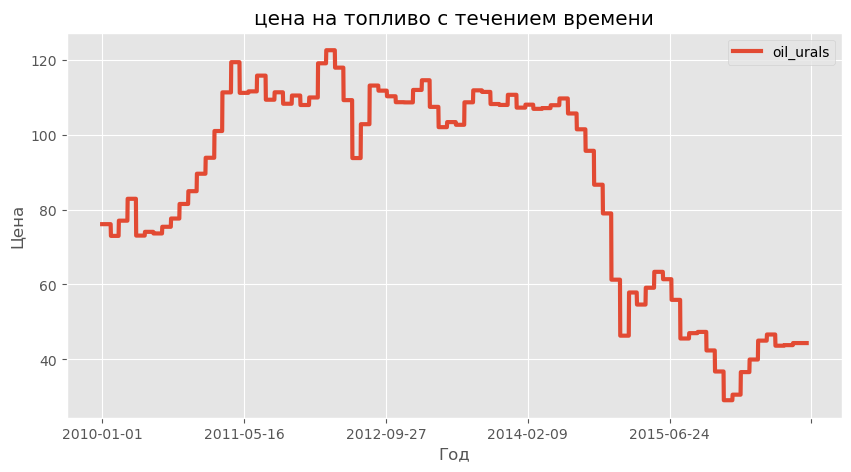

In [98]:
(datamacro
    
     .pivot_table(index='timestamp', values=['oil_urals'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='цена на топливо с течением времени')
     
)
plt.xlabel('Год')
plt.ylabel('Цена')

plt.show()

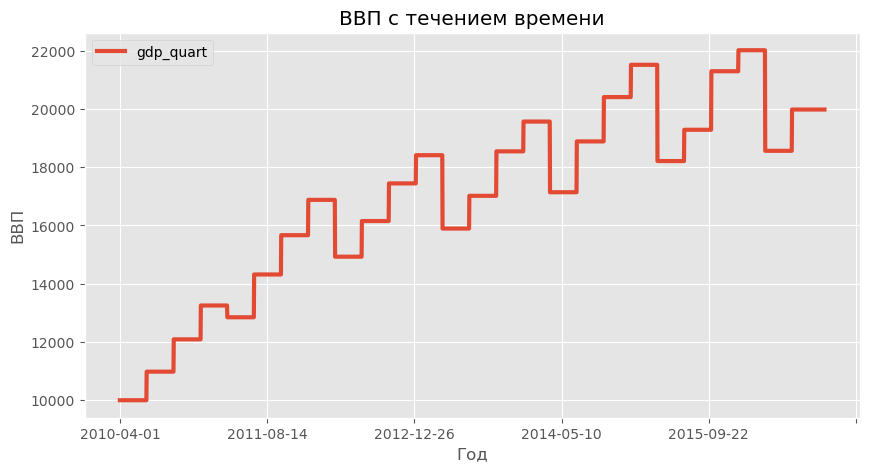

In [104]:
(datamacro
    
     .pivot_table(index='timestamp', values=['gdp_quart'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='ВВП с течением времени')
     
)
plt.xlabel('Год')
plt.ylabel('ВВП')

plt.show()

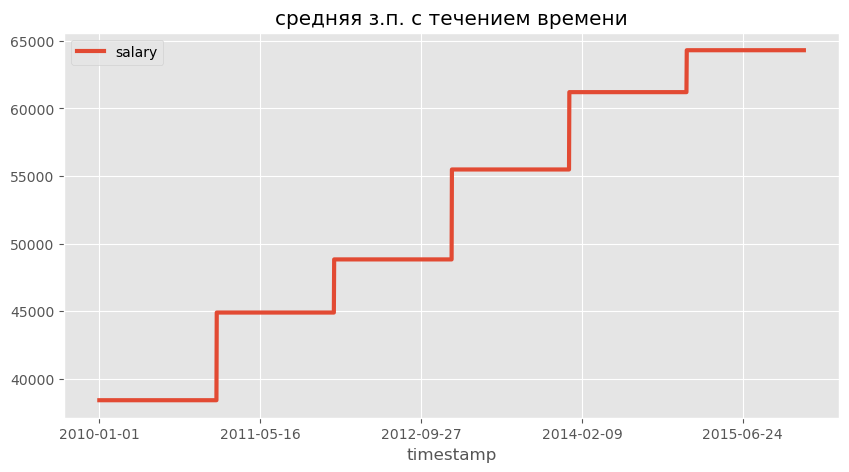

In [105]:
(datamacro
    
     .pivot_table(index='timestamp', values=['salary'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='средняя з.п. с течением времени')
     
)

plt.show()

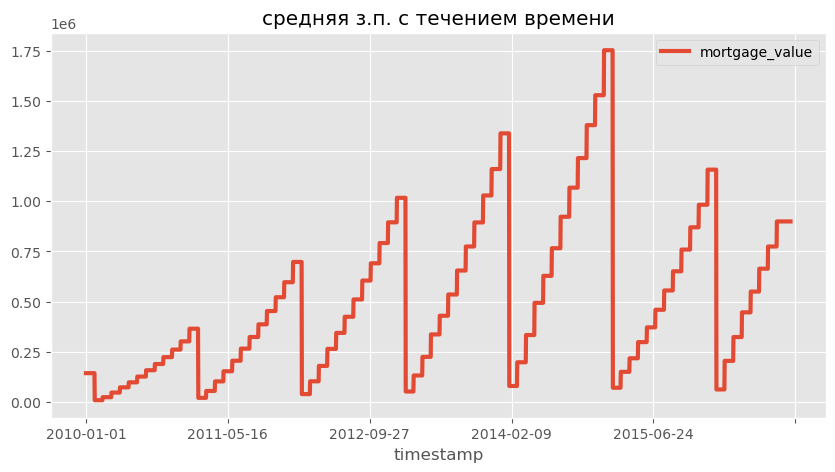

In [106]:
(datamacro
    
     .pivot_table(index='timestamp', values=['mortgage_value'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='средняя з.п. с течением времени')
     
)

plt.show()

Вывод:

СРАВНИМ ЭТИ ДАННЫЕ С СОВРЕМЕННЫМИ ДАННЫМИ:

In [109]:
moderndata = data = pd.read_csv('base (1).csv', index_col = 0)

In [110]:
# посмотрим на современные данные
moderndata.head()

,lat,lon,floor,square,rooms,price
id,,,,,,
1,57.809889,28.263379,7,72.0,3,7560000
2,57.826462,28.274752,6,71.5,1,5900000
3,57.816902,28.393877,1,70.1,3,5050000
4,57.816814,28.285854,5,67.9,3,5150000
5,57.809101,28.344147,1,46.0,2,4190000


In [118]:
print('Современные данные: ')
moderndata['price'].describe()

Современные данные: 


count    1.608000e+03
mean     4.339993e+06
std      2.000274e+06
min      3.400000e+05
25%      3.068070e+06
50%      3.937350e+06
75%      5.050000e+06
max      2.700000e+07
Name: price, dtype: float64

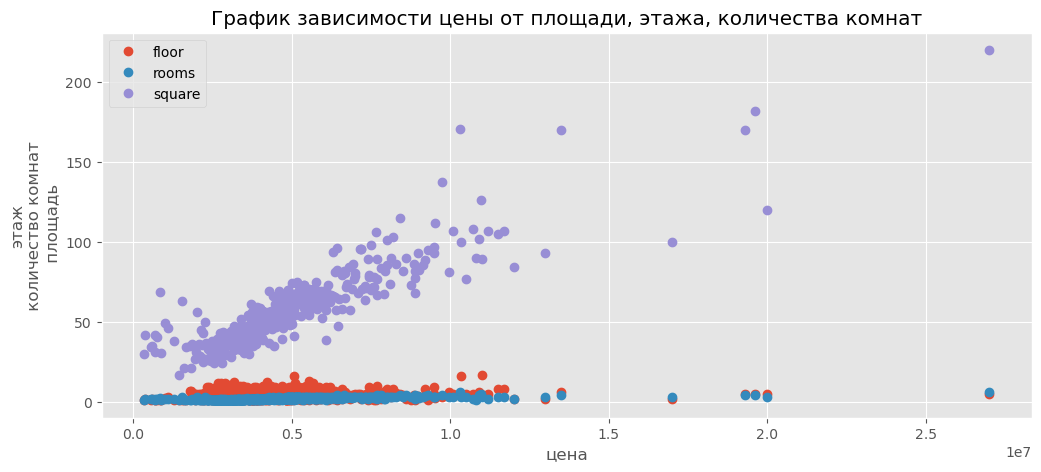

In [121]:
(moderndata
    
     .pivot_table(index='price', values=['square','floor', 'rooms'])
     .plot(style='o',grid=True, figsize=(12, 5), title='График зависимости цены от площади, этажа, количества комнат')
)
plt.xlabel('цена')
plt.ylabel('этаж\n количество комнат \n площадь')
plt.show()

ВЫВОД:

Цена на недвижимость меняется с течением времени. Это зависит от многих параметов, в том числе и от макроэкономических. 
Многие факторы макроэкономики напрямую связаны с изменением цены на недвижимость. 
Однако основные параметры, такие, как площадь, количество комнат, этаж, количество этажей в здании не сильно меняются
с течением времени в контексте доли влияния этих параметров непосредственно на цену недвижимости